In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv( "/content/EV_2 (1).csv" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EV      1101 non-null   float64
 1   AV      1101 non-null   float64
 2   OVX     1101 non-null   float64
 3   BTCE    1101 non-null   float64
 4   ARCA    1101 non-null   float64
 5   OIL     1101 non-null   float64
 6   NG      1101 non-null   float64
 7   ST      1101 non-null   float64
 8   REM     1101 non-null   float64
dtypes: float64(9)
memory usage: 77.5 KB


In [ ]:
c=df.dropna()
X_features = list( c.columns )
X_features.remove('EV')
X_features

['AV', 'OVX', 'BTCE', 'ARCA', 'OIL', 'NG', 'ST', 'REM']

In [ ]:
encoded_df = pd.get_dummies( c[X_features], drop_first = True )
list(encoded_df.columns)

['AV', 'OVX', 'BTCE', 'ARCA', 'OIL', 'NG', 'ST', 'REM']

In [ ]:
X=encoded_df
Y=c.EV
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import matplotlib.pylab as plt
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state = 42)

In [ ]:
import shap
my_model = GradientBoostingRegressor().fit(X, Y)
#explainer = shap.TreeExplainer(my_model)

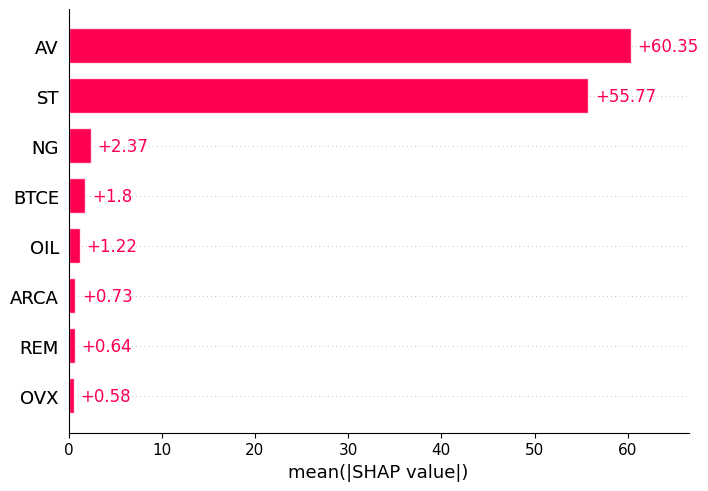

In [ ]:
explainer = shap.Explainer(my_model)
shap_values2 = explainer(X)
shap.plots.bar(shap_values2)

Generating summary plot...


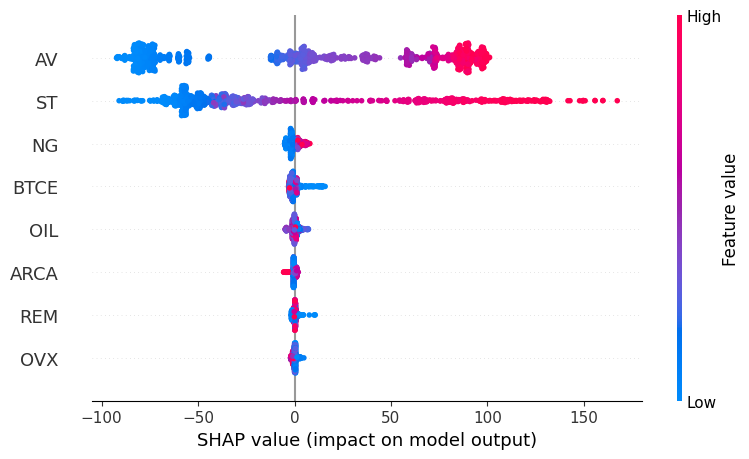

In [ ]:
# Summary plot
print("Generating summary plot...")
shap.summary_plot(shap_values2, X)

In [ ]:
!pip install PyALE

SHAP (SHapley Additive exPlanations) values are a way to explain the output of any machine learning model. They indicate how much each feature contributes to the prediction for a specific instance.

In [ ]:
from PyALE import ale

In [ ]:
features = ["AV", "OVX", "BTCE", "ARCA", "OIL", "NG","ST", "REM"]

INFO:PyALE._ALE_generic:Continuous feature detected.


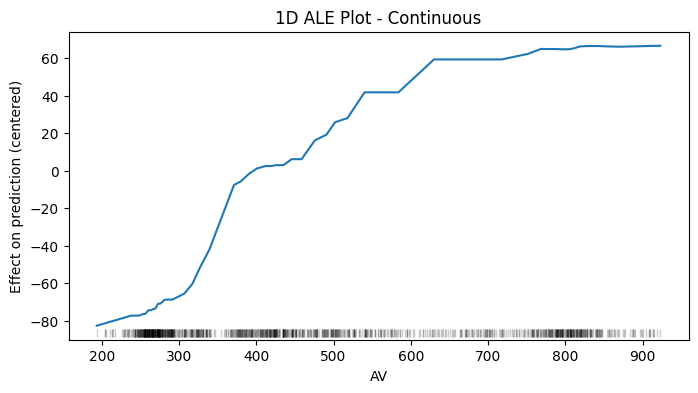

In [ ]:
ale_eff = ale(
    X=X[features], model=my_model, feature=["AV"], grid_size=50, include_CI=False
)

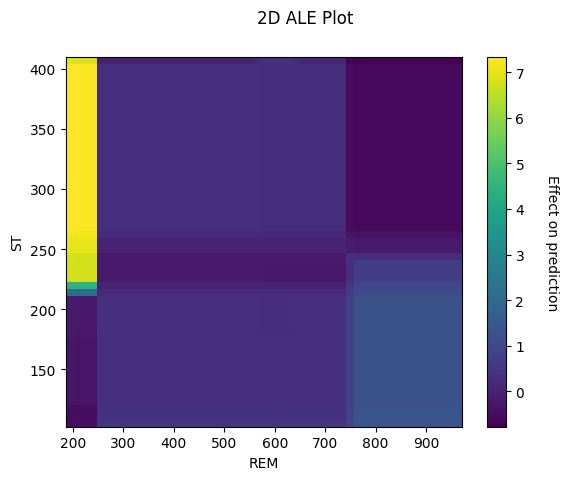

In [ ]:
ale_eff = ale(X=X[features], model=my_model, feature=["ST","REM"], grid_size=50)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4ec0a15ad4f8096aab9b14331f9194ca672e932d8b3785472b01a9d060985c24
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
dataset = pd.read_csv('/content/EV_2 (1).csv')
Y=dataset['EV']
X=dataset[['AV', 'OVX','BTCE', 'ARCA', 'OIL', 'NG', 'ST', 'REM']]
X_featurenames=X.columns

In [ ]:
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

print('--- Training Set Performance ---')
print(f'R-squared: {metrics.r2_score(Y_train, Y_train_pred):.4f}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(Y_train, Y_train_pred):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(Y_train, Y_train_pred):.4f}')

print('\n--- Test Set Performance ---')
print(f'R-squared: {metrics.r2_score(Y_test, Y_test_pred):.4f}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(Y_test, Y_test_pred):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(Y_test, Y_test_pred):.4f}')

NameError: name 'clf' is not defined

In [ ]:
model = GradientBoostingRegressor().fit(X, Y)

Intercept 343.7255560375024
Prediction_local [156.53534986]
Right: 131.6295730677084


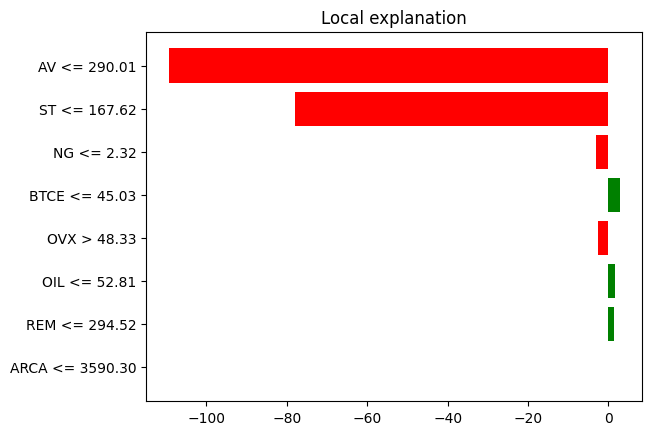

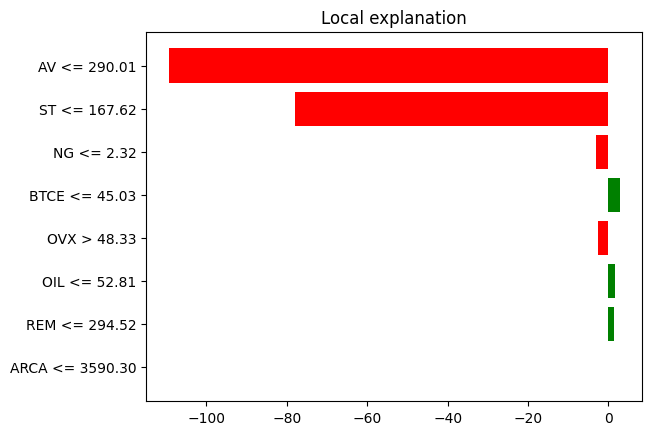

In [ ]:
explainer=lime.lime_tabular.LimeTabularExplainer(np.array(X),feature_names=X_featurenames, class_names=['Regression'],verbose=True,mode='regression')
exp=explainer.explain_instance(X.iloc[319],model.predict,num_features=20)
exp.as_pyplot_figure()

LIME (Local Interpretable Model-agnostic Explanations) is used to explain the predictions of any machine learning model in a human-understandable way. It does this by creating a simpler, interpretable model around a single prediction that you want to explain, locally approximating the behavior of the black-box model.

In [ ]:
Y_train_pred_my_model = my_model.predict(X_train)
Y_test_pred_my_model = my_model.predict(X_test)

print('--- Training Set Performance (my_model) ---')
print(f'R-squared: {metrics.r2_score(Y_train, Y_train_pred_my_model):.4f}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(Y_train, Y_train_pred_my_model):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(Y_train, Y_train_pred_my_model):.4f}')

print('\n--- Test Set Performance (my_model) ---')
print(f'R-squared: {metrics.r2_score(Y_test, Y_test_pred_my_model):.4f}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(Y_test, Y_test_pred_my_model):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(Y_test, Y_test_pred_my_model):.4f}')

--- Training Set Performance (my_model) ---
R-squared: 0.9992
Mean Absolute Error: 2.5608
Mean Squared Error: 12.3689

--- Test Set Performance (my_model) ---
R-squared: 0.9993
Mean Absolute Error: 2.5169
Mean Squared Error: 12.2465
